<a href="https://colab.research.google.com/github/Sankarlalr23/Automotive_Telematics_Analytics/blob/main/Telematics_Hierarchial_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Workbook is crashing while Running. Better not to use as it need a lot of RAM Space.


In [ ]:
import warnings                         #'do not disturb' mode
warnings.filterwarnings('ignore')

import numpy as np                      # vectors and matrices
import pandas as pd                     # tables and data manipulations
import matplotlib.pyplot as plt         # plots
import seaborn as sns                   # more plots

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

train_path='/content/drive/My Drive/Xen.AI/'
data = pd.read_csv('/content/drive/My Drive/Xen.AI/telematics_data.csv')   # data importing

Mounted at /content/drive/


In [ ]:
data.head()

,year,month,day,vin,wmi,engine_cd,device_type,msg_ts,vin_utc_key,packet_id,reason_code,script_version,deviceid,latitude,longitude,driveridcode1,obdvin,vehiclebattvolts,fuel_total,engine_rpm,coolant_tmp,fuel_lvl_pct,driving_tme_sec,cruise_tme_sec,idle_tme_sec,idle_fuel_total,pto_tme_total,pto_fuel_total,gear,fuel_tmp,oil_tmpl,throt_pos,mpg,acel_pos,engine_pct_load,torque,oil_lvl,oil_psi,coolant_psi,intak_air_tmp,manifold_tmp,vehiclespeed,heading,odometerinmeters,odometer
0,2020,4,18,3HSDZTZR9KN352697,3HS,TZ,Xirgo,2020-04-18 06:50:40,3HSDZTZR9KN3526972020-04-18 06:50:40,36,9,204.0,173101817,38.799149,-90.603680,0.0,3HSDZTZR9KN352697,14.2,106165.0,1144.0,79.0,41.0,NaN,NaN,2167380.0,1503.0,0.0,0.0,1.0,0.0,76.0,0.0,NaN,0.0,11.0,12.0,0.0,340.0,0.0,4.0,10.0,1005.0,960.0,380663000.0,380663.0
1,2020,5,20,3HSDZTZR9LN055320,3HS,TZ,Xirgo,2020-05-20 03:01:09,3HSDZTZR9LN0553202020-05-20 03:01:09,36,9,204.0,172301945,33.618963,-84.333847,0.0,3HSDZTZR9LN055320,NaN,NaN,584.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,56.0,1.0,NaN,0.0,26.0,11.0,0.0,228.0,0.0,24.0,NaN,11.0,700.0,88781990.0,NaN
2,2020,4,1,3HSDZTZR0KN354211,3HS,TZ,Xirgo,2020-04-01 20:02:39,3HSDZTZR0KN3542112020-04-01 20:02:39,36,9,204.0,173511306,41.139005,-101.173123,0.0,3HSDZTZR0KN354211,NaN,113134.0,1145.0,81.0,NaN,NaN,NaN,1788120.0,1172.0,NaN,0.0,1.0,0.0,NaN,0.0,NaN,NaN,41.0,42.0,NaN,320.0,0.0,25.0,NaN,NaN,2709.0,416436440.0,NaN
3,2020,5,5,3HSDWTZR8LN845362,3HS,TZ,Xirgo,2020-05-05 06:17:36,3HSDWTZR8LN8453622020-05-05 06:17:36,36,9,204.0,173404340,38.856184,-98.139251,0.0,3HSDWTZR8LN845362,14.0,149410.0,1368.0,81.0,54.0,NaN,NaN,786600.0,497.0,0.0,0.0,1.0,0.0,86.0,0.0,NaN,0.0,19.0,19.0,0.0,424.0,0.0,13.0,30.0,1095.0,838.0,426460520.0,NaN
4,2020,4,7,3HSDZTZRXLN085409,3HS,TZ,N2,2020-04-07 20:14:07,3HSDZTZRXLN0854092020-04-07 20:14:07,36,9,204.0,190815-0009,33.351086,-87.017387,0.0,3HSDZTZRXLN085409,14.1,33886.0,1167.0,82.0,NaN,4755420.0,NaN,NaN,504.0,0.0,0.0,1.0,NaN,88.0,0.0,NaN,NaN,65.0,67.0,NaN,320.0,NaN,NaN,NaN,1090.0,458.0,107975440.0,NaN


In [ ]:
# Data frame with important variables only
df = pd.DataFrame(data, columns = ['vin','msg_ts','device_type','fuel_total','engine_rpm','coolant_tmp','oil_tmpl',
                       'throt_pos','torque','oil_psi','manifold_tmp','vehiclespeed','odometerinmeters'])

In [ ]:
df['msg_ts']=pd.to_datetime(df['msg_ts'])  # Converting msg_ts to date time

In [ ]:
df = df.reset_index()
df = df.drop('index', axis =1)

In [ ]:
df.isnull().sum()/len(df) * 100 

vin                  0.000000
msg_ts               0.000000
device_type          0.000000
fuel_total          11.810623
engine_rpm           0.000000
coolant_tmp         11.096828
oil_tmpl            11.075469
throt_pos           11.072168
torque               7.697760
oil_psi             11.084984
manifold_tmp        10.909447
vehiclespeed         5.309576
odometerinmeters     5.280256
dtype: float64

In [ ]:
df = df.dropna(axis = 0, how = 'any')

In [ ]:
df = df[df["device_type"] == 'Xirgo']
df = df[df["engine_rpm"] >= 1000]

In [ ]:
df = df.drop('device_type', axis =1)

df = df.reset_index()
df = df.drop('index', axis =1)

In [ ]:
df.isnull().sum()/len(df) * 100 

vin                 0.0
msg_ts              0.0
fuel_total          0.0
engine_rpm          0.0
coolant_tmp         0.0
oil_tmpl            0.0
throt_pos           0.0
torque              0.0
oil_psi             0.0
manifold_tmp        0.0
vehiclespeed        0.0
odometerinmeters    0.0
dtype: float64

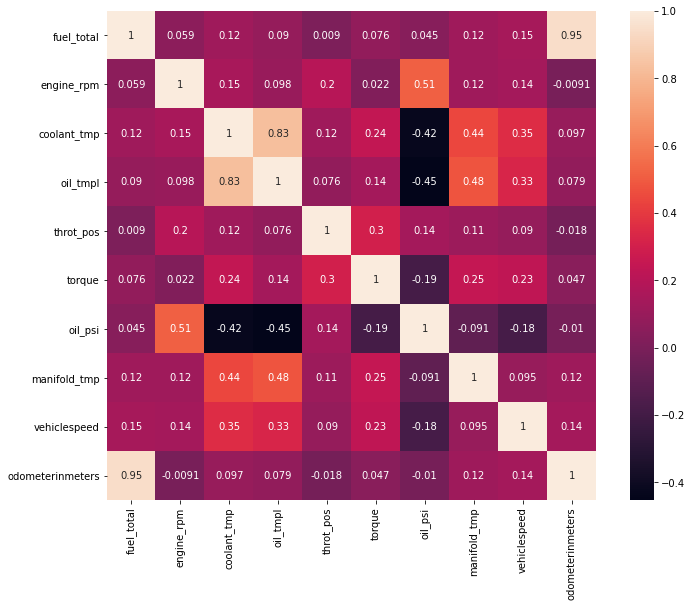

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=1, square=True, annot = True)
plt.show()

In [ ]:
dups = df.pivot_table(index = ['vin'], aggfunc ='size')
dupsdf=pd.DataFrame(dups)
dupsdf=dupsdf.apply(lambda x: x.sort_values(ascending=False))
print(dupsdf.index[:100])

Index(['3HSDZTZR5LN134290', '1HSERTZRXLH809470', '3HSDZTZRXLN395656',
       '3HSDZTZR3LN154022', '3HSDZTZR0LN880114', '3HSDZTZR3KN315175',
       '3HSDZTZR1KN174476', '3HSDZTZR8KN398425', '3HSDZTZR3LN833708',
       '3HSDZTZR4LN056083', '3HSDZTZR7LN630689', '3HSDZTZR6LN065318',
       '3HSDZTZR6LN056148', '3HSDZTZR8LN139435', '3HSDWTZR2LN845423',
       '3HSDZTZR5KN140444', '3HSDZTZR4LN822992', '3HSDZTZR4KN126504',
       '3HSDWTZR5LN844783', '3HSDZTZR2LN112232', '3HSDZTZR8KN537162',
       '3HSDZTZR9KN136686', '3HSDZTZR6KN540223', '3HSDZTZR4KN227364',
       '3HSDZTZR1LN081863', '3HSDZTZR0KN279915', '3HSDZTZR2LN817113',
       '3HSDZTZR0LN437333', '3HSDWTZR9LN810071', '3HSDWTZR6LN844811',
       '3HCDZTZRXLL056502', '3HSDZTZR0LN384388', '3HSDZTZR3LN054647',
       '3HSDWTZR3LN845348', '3HSDZTZR6LN056070', '3HSDZTZR9LN055320',
       '3HSDWTZR7LN064378', '3HSDZTZR1LN125327', '3HSDWTZR9LN844849',
       '3HSDZTZR6LN112511', '3HSDWTZR2LN845308', '3HSDZTZRXLN443043',
       '3HSDZTZR1LN2

In [ ]:
top10_vins = list(dupsdf.index[:5])
df_top10 = df[df['vin'].isin(top10_vins)]

# Apply Hierarchical Clustering to Time Series

In [ ]:
df_top10.columns

Index(['vin', 'msg_ts', 'fuel_total', 'engine_rpm', 'coolant_tmp', 'oil_tmpl',
       'throt_pos', 'torque', 'oil_psi', 'manifold_tmp', 'vehiclespeed',
       'odometerinmeters'],
      dtype='object')

In [ ]:
pip install sktime

     |████████████████████████████████| 5.7MB 4.9MB/s 
     |████████████████████████████████| 9.5MB 30.6MB/s 
     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sktime.distances.elastic_cython import dtw_distance

# df_col = pd.DataFrame(data = df_top10, columns = ['fuel_total', 'engine_rpm', 'coolant_tmp','oil_tmpl','throt_pos', 
#                                                        'torque', 'oil_psi', 'manifold_tmp', 'vehiclespeed','odometerinmeters'])
df_col = pd.DataFrame(data = df_top10, columns = ['engine_rpm','coolant_tmp'])

In [ ]:
series_list = df_col.values

In [ ]:
series_list = series_list.reshape(series_list.shape[0], series_list.shape[1],1)

In [ ]:
for i in range(len(series_list)):
    length = len(series_list[i])
    # series_list[i] = np.array(series_list[i]).reshape((length,2))

In [ ]:
series_list

array([[[1240.],
        [  81.]],

       [[1319.],
        [  83.]],

       [[1226.],
        [  87.]],

       ...,

       [[1260.],
        [  81.]],

       [[1141.],
        [  81.]],

       [[1264.],
        [  80.]]])

In [ ]:
# Initialize distance matrix
n_series = len(series_list)
distance_matrix = np.zeros(shape=(n_series, n_series))

In [ ]:
print(series_list[0])

[[1240.]
 [  81.]]


In [ ]:
# Build distance matrix
for i in range(n_series):
    for j in range(n_series):
        x = series_list[i]
        y = series_list[j]
        if i != j:
            dist = dtw_distance(x, y)
            distance_matrix[i, j] = dist

In [ ]:
#Binary data
np.save('distance_matrix.npy', distance_matrix)

#Human readable data
np.savetxt('distance_matrix.txt', distance_matrix)

In [ ]:
# distance_matrix = np.load('distance_matrix.npy')

In [ ]:
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram

def hierarchical_clustering(dist_mat, method='complete'):
    if method == 'complete':
        Z = complete(distance_matrix)
    if method == 'single':
        Z = single(distance_matrix)
    if method == 'average':
        Z = average(distance_matrix)
    if method == 'ward':
        Z = ward(distance_matrix)
    
    fig = plt.figure(figsize=(16, 8))
    dn = dendrogram(Z)
    plt.title(f"Dendrogram for {method}-linkage with correlation distance")
    plt.show()
    
    return Z

In [ ]:
linkage_matrix = hierarchical_clustering(distance_matrix)